# Cosmic Rays Formal Report

This notebook is written along side Adam Quayle's 2025 formal report titled "Determination of the Angular Distribution of Muons as Secondary Cosmic Rays. Along with the code used to produce the graphics in the report, some calculations are also done here which were not directly shown in the paper for brevity. In particular, the calculation of the various $\chi^{2}$ values quoted in the report appear at the bottom of this notebook in their own section.

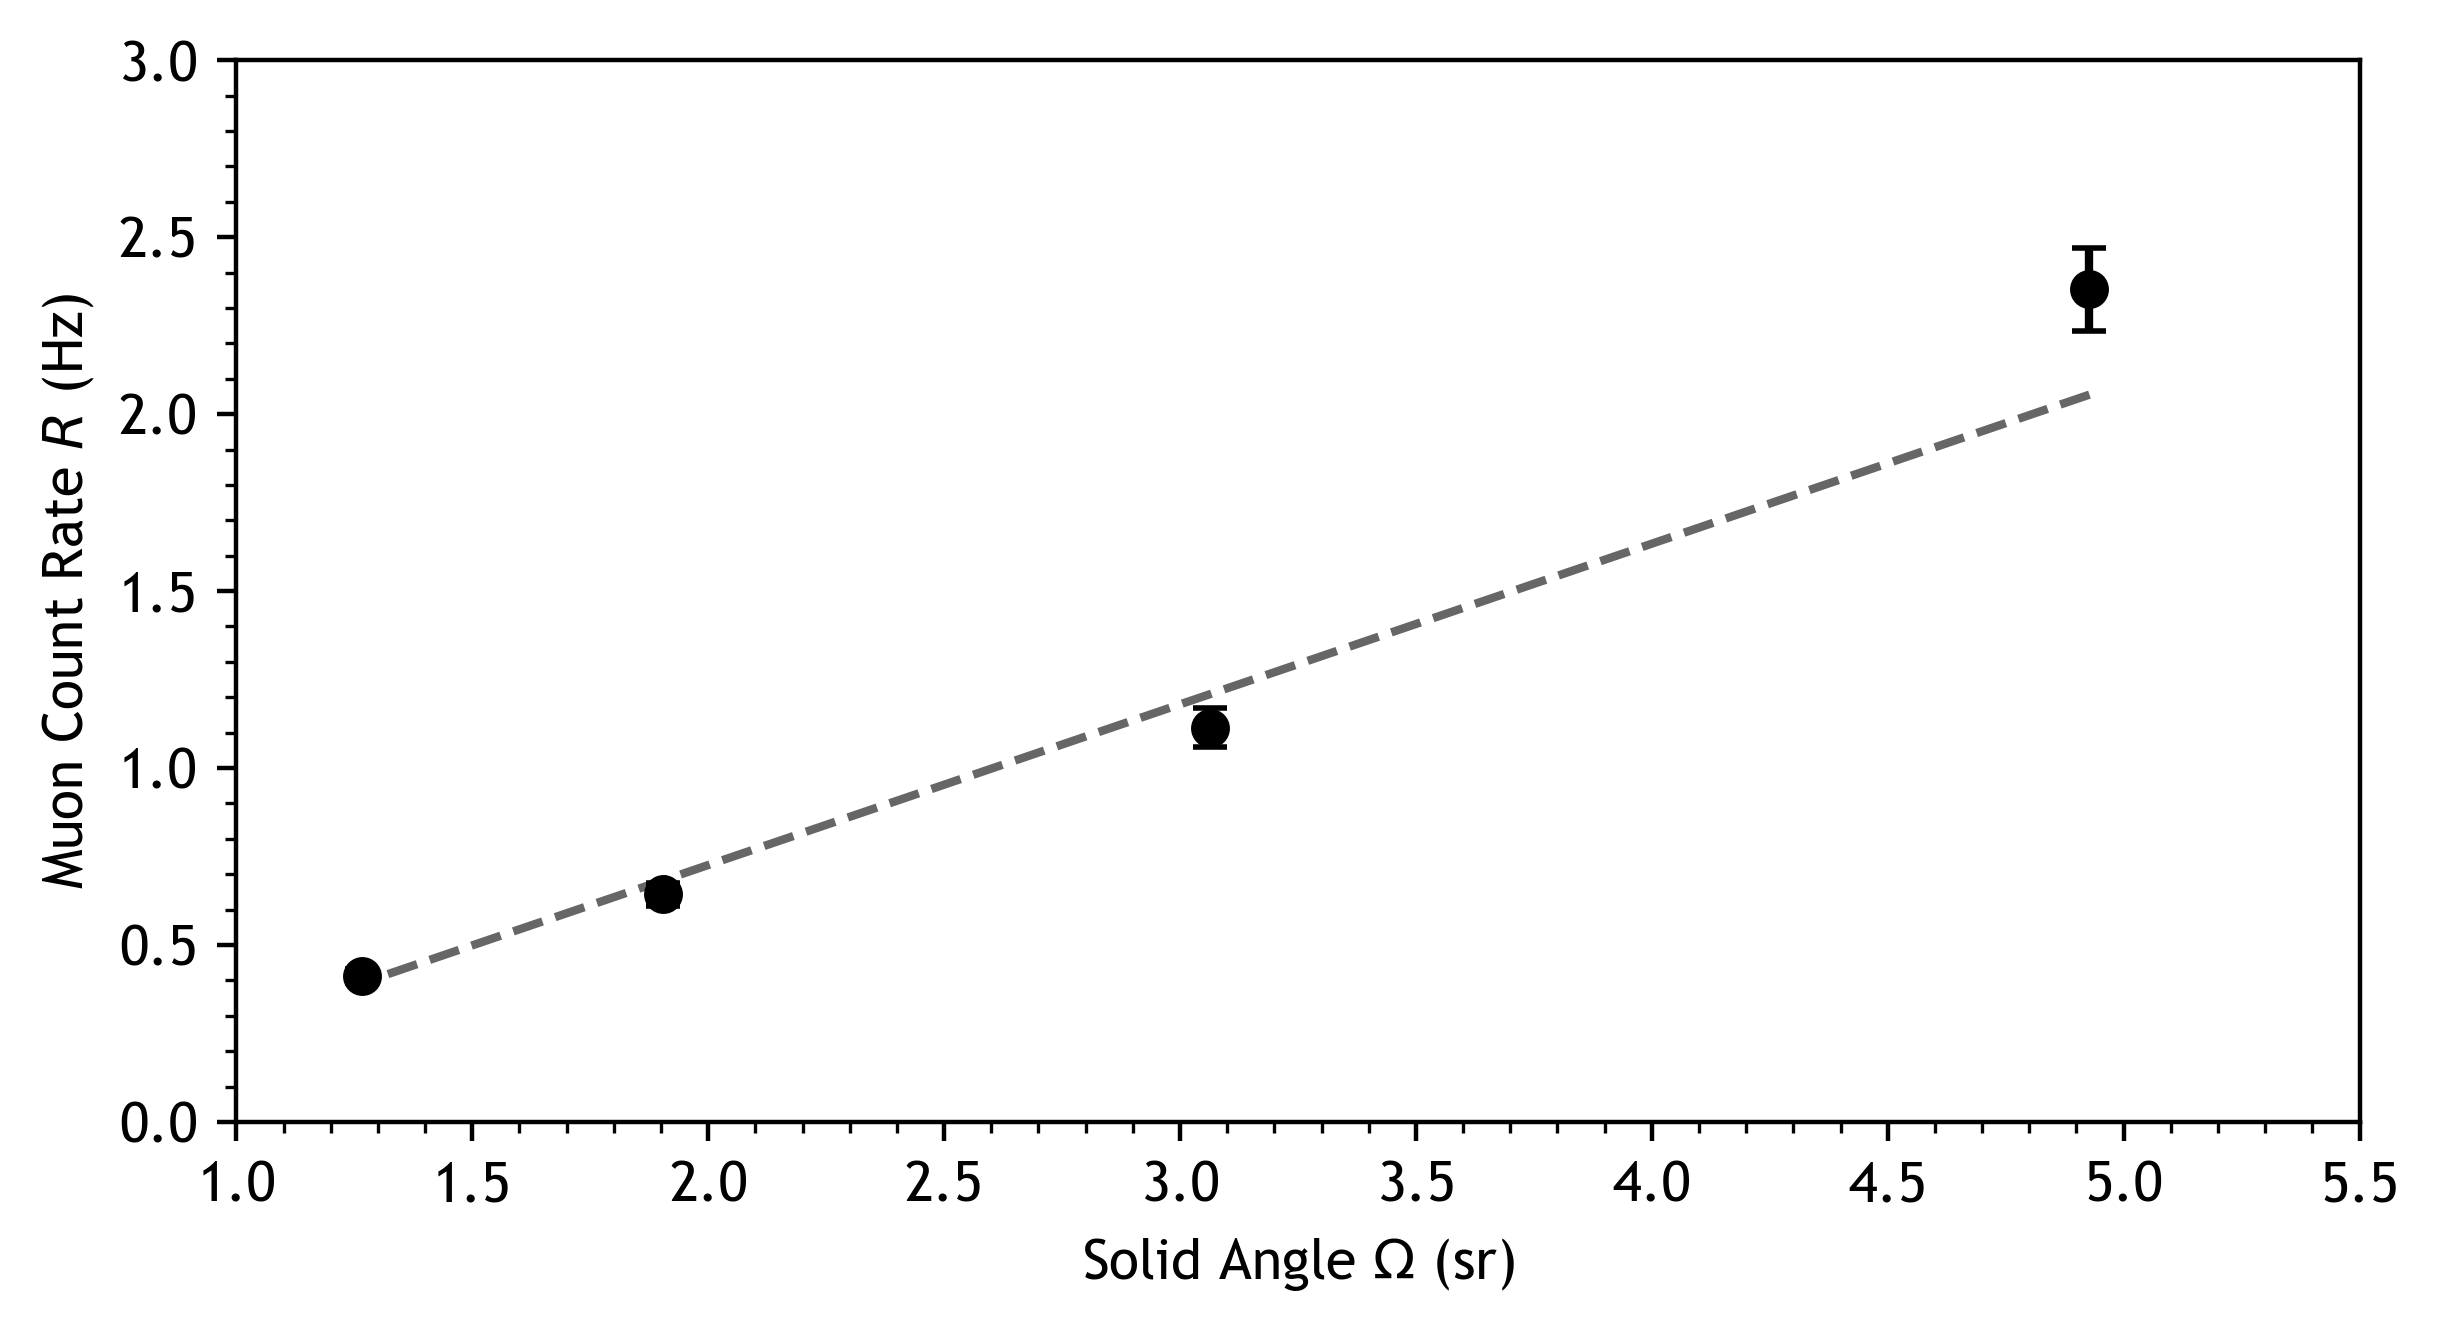

In [200]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 400

N_mu = 400 # Number of muon counts taken
L = 32*np.sqrt(2) # Length of the scintillator in centimetres.
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
Omega = 2*np.pi*(1-np.cos(theta/2)) # approximate solid angle subtended by scintillators

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B = np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=1)
regression = np.poly1d((A, B))

max_rate = np.max(N_mu/t)

fig, ax = plt.subplots()

ax.minorticks_on()
ax.set_box_aspect(0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.tight_layout()

ax.set_ylim(-0,3)
ax.set_xlim(1,5.5)

ax.set_xlabel("Solid Angle $\Omega$ (sr)", size=10)
ax.set_ylabel("Muon Count Rate $R$ (Hz)", size=10)

ax.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3)
ax.plot(Omega,regression(Omega),'k--', alpha=0.6)
ax.scatter(Omega, N_mu/t, color='k', marker='o', s=5)
plt.show()

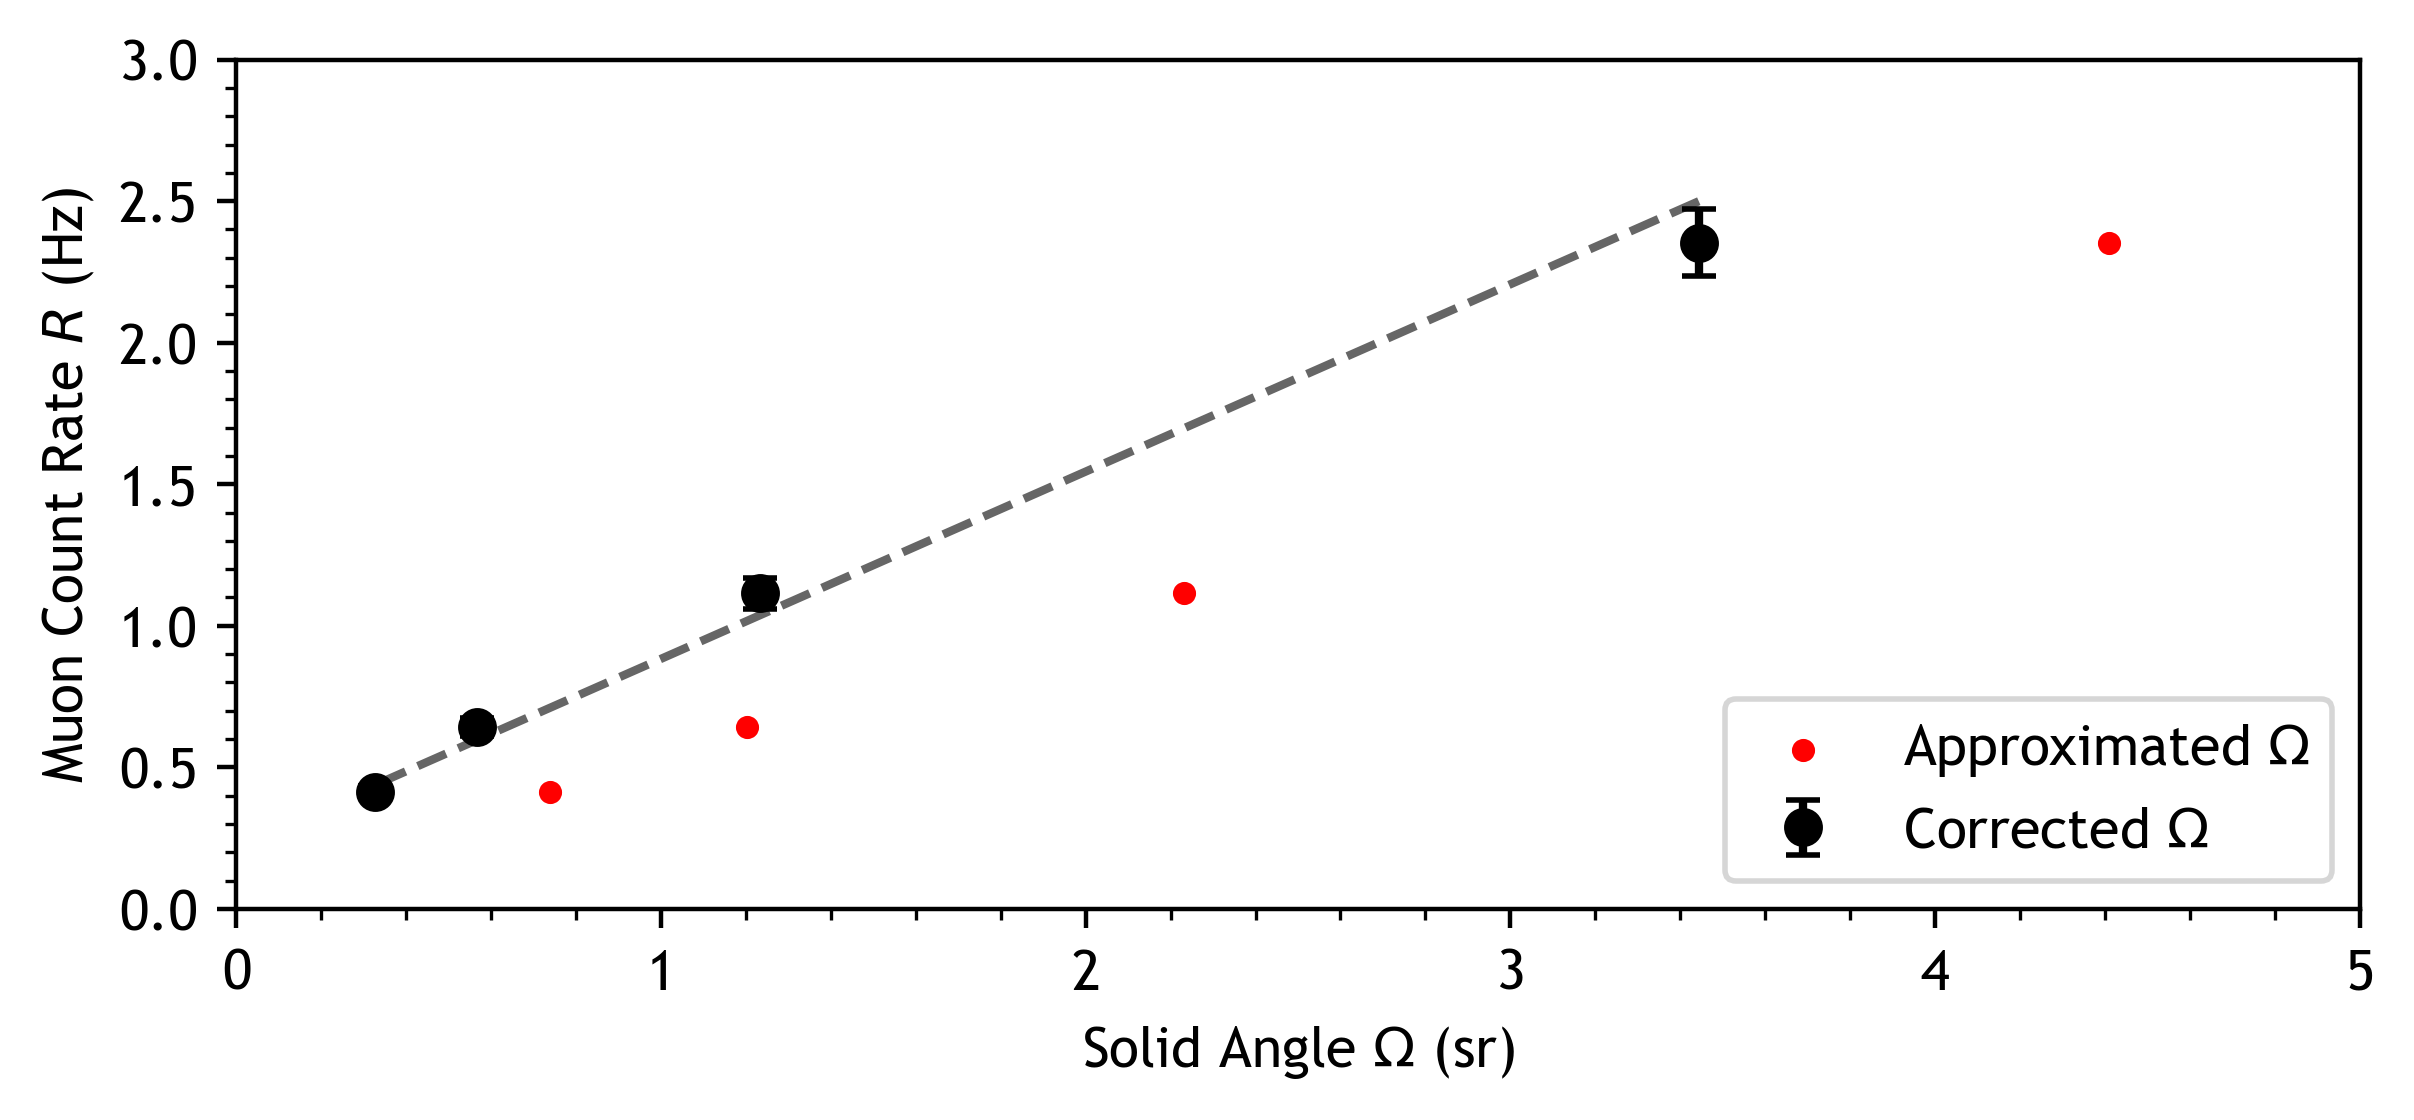

0.01921691808513054


In [141]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 400

N_mu = 400 # Number of muon counts taken
L = 32 # Length of the scintillator in centimetres.
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
R = t/400 + t/np.sqrt(400)
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
l = 32
b = 40
Omega = 4*np.arcsin((l*b)/np.sqrt((l**2 + 4*d**2)*(b**2 + 4*d**2))) #Solid angle subtended by scintillators
Omega_old = 2*np.pi*(1-np.cos(theta/2))

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B= np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=1)
regression = np.poly1d((A, B))

max_rate = np.max(N_mu/t)

fig, ax = plt.subplots()

ax.minorticks_on()
ax.set_box_aspect(0.4)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.tight_layout()

ax.set_ylim(-0,3)
ax.set_xlim(0,5)

ax.set_xlabel("Solid Angle $\Omega$ (sr)", size=10)
ax.set_ylabel("Muon Count Rate $R$ (Hz)", size=10)

ax.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3, label="Corrected $\Omega$")
ax.plot(Omega,regression(Omega),'k--', alpha=0.6)
ax.scatter(Omega_old, N_mu/t, color='r', marker='o', s=10, label="Approximated $\Omega$")
plt.legend(loc=4)
plt.show()

chi2 = 0
for i in range(4):
    chi2 += ((regression(Omega[i]) - N_mu/t[i])**2)/regression(Omega[i])
                                                       
print(chi2)

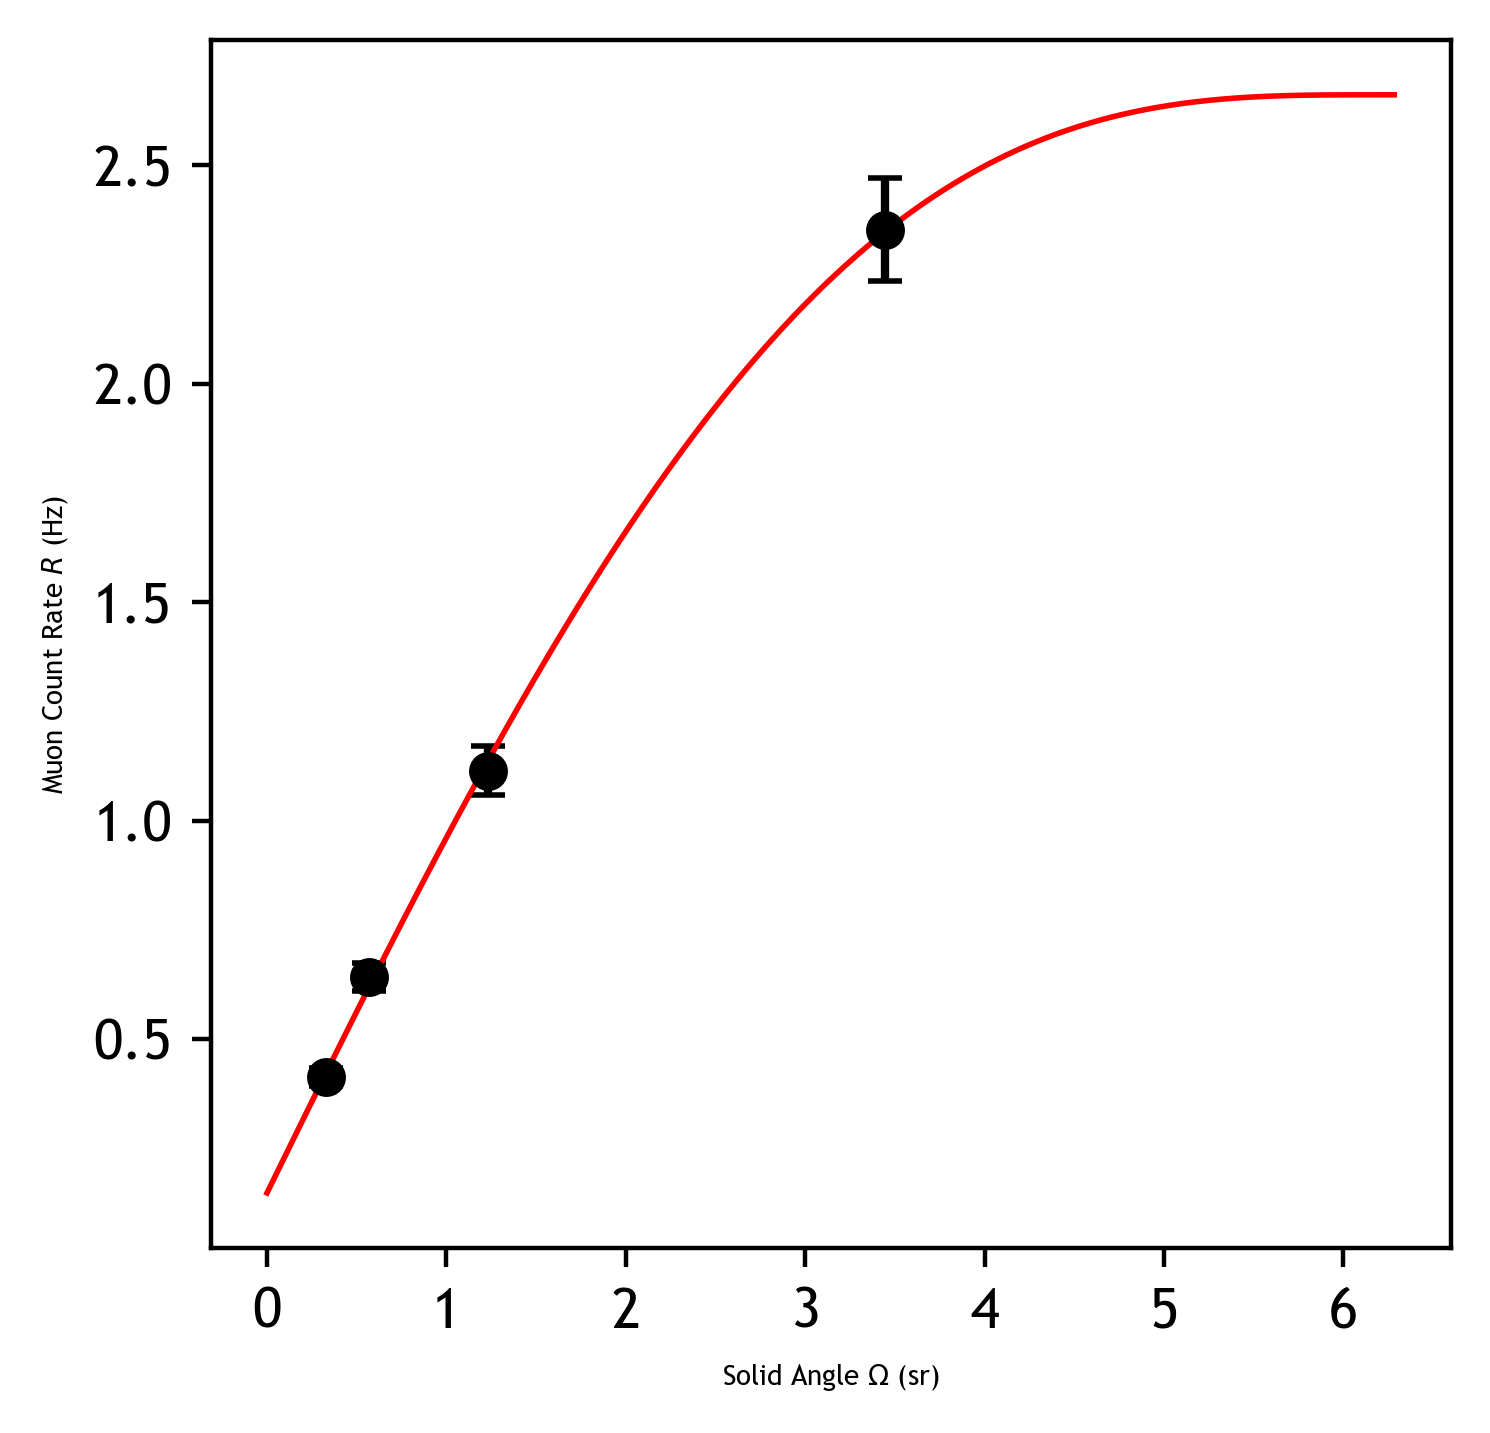

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as ssopt


def fit(x,a,b,c):
    return a*((1/2)*c*(x-b) + np.sin(2*(c*(x-b))/4))
            

N_mu = 400 # Number of muon counts taken
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
R = t/400 + t/np.sqrt(400)
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
Omega = 4*np.arcsin((l*b)/np.sqrt((l**2 + 4*d**2)*(b**2 + 4*d**2))) #Solid angle subtended by scintillators
Omega_old = 2*np.pi*(1-np.cos(theta/2))

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B = ssopt.curve_fit(f=fit, xdata=Omega, ydata=N_mu/t, sigma=np.sqrt(N_mu)/t)

#Calculate coefficients for line of best fit (minimise chi-squared)
C, D= np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=1)
regression = np.poly1d((C, D))

yfit = []
for x in np.linspace(0,2*np.pi,1000):
    yfit.append(fit(x, A[0], A[1], A[2]))

max_rate = np.max(N_mu/t)

fig, ax = plt.subplots(figsize=(4,4))

ax.set_xlabel("Solid Angle $\Omega$ (sr)", size=5)
ax.set_ylabel("Muon Count Rate $R$ (Hz)", size=5)

ax.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3)
ax.plot(np.linspace(0,2*np.pi,1000), yfit, color='r', linewidth=1)
plt.show()

## $\chi^{2}$ Sum Calculations

Throughout the report, and particularly near the end, there are a few times in which the chi-squared sum of a dataset is calculated with respect to some relevant regression. Below are the lines of code which were used to calculate these values. They are catagorised by page number and are ordered by order of appearance.

### Page 4

This code is copied and pasted from an above block which contains the data necessary to calculate the $\chi^{2}$ sum. The particularly relavant section has been labelled appropriately. For further clarification, the relavant plot is also generated.

chi^2 sum = 0.04903834947032391


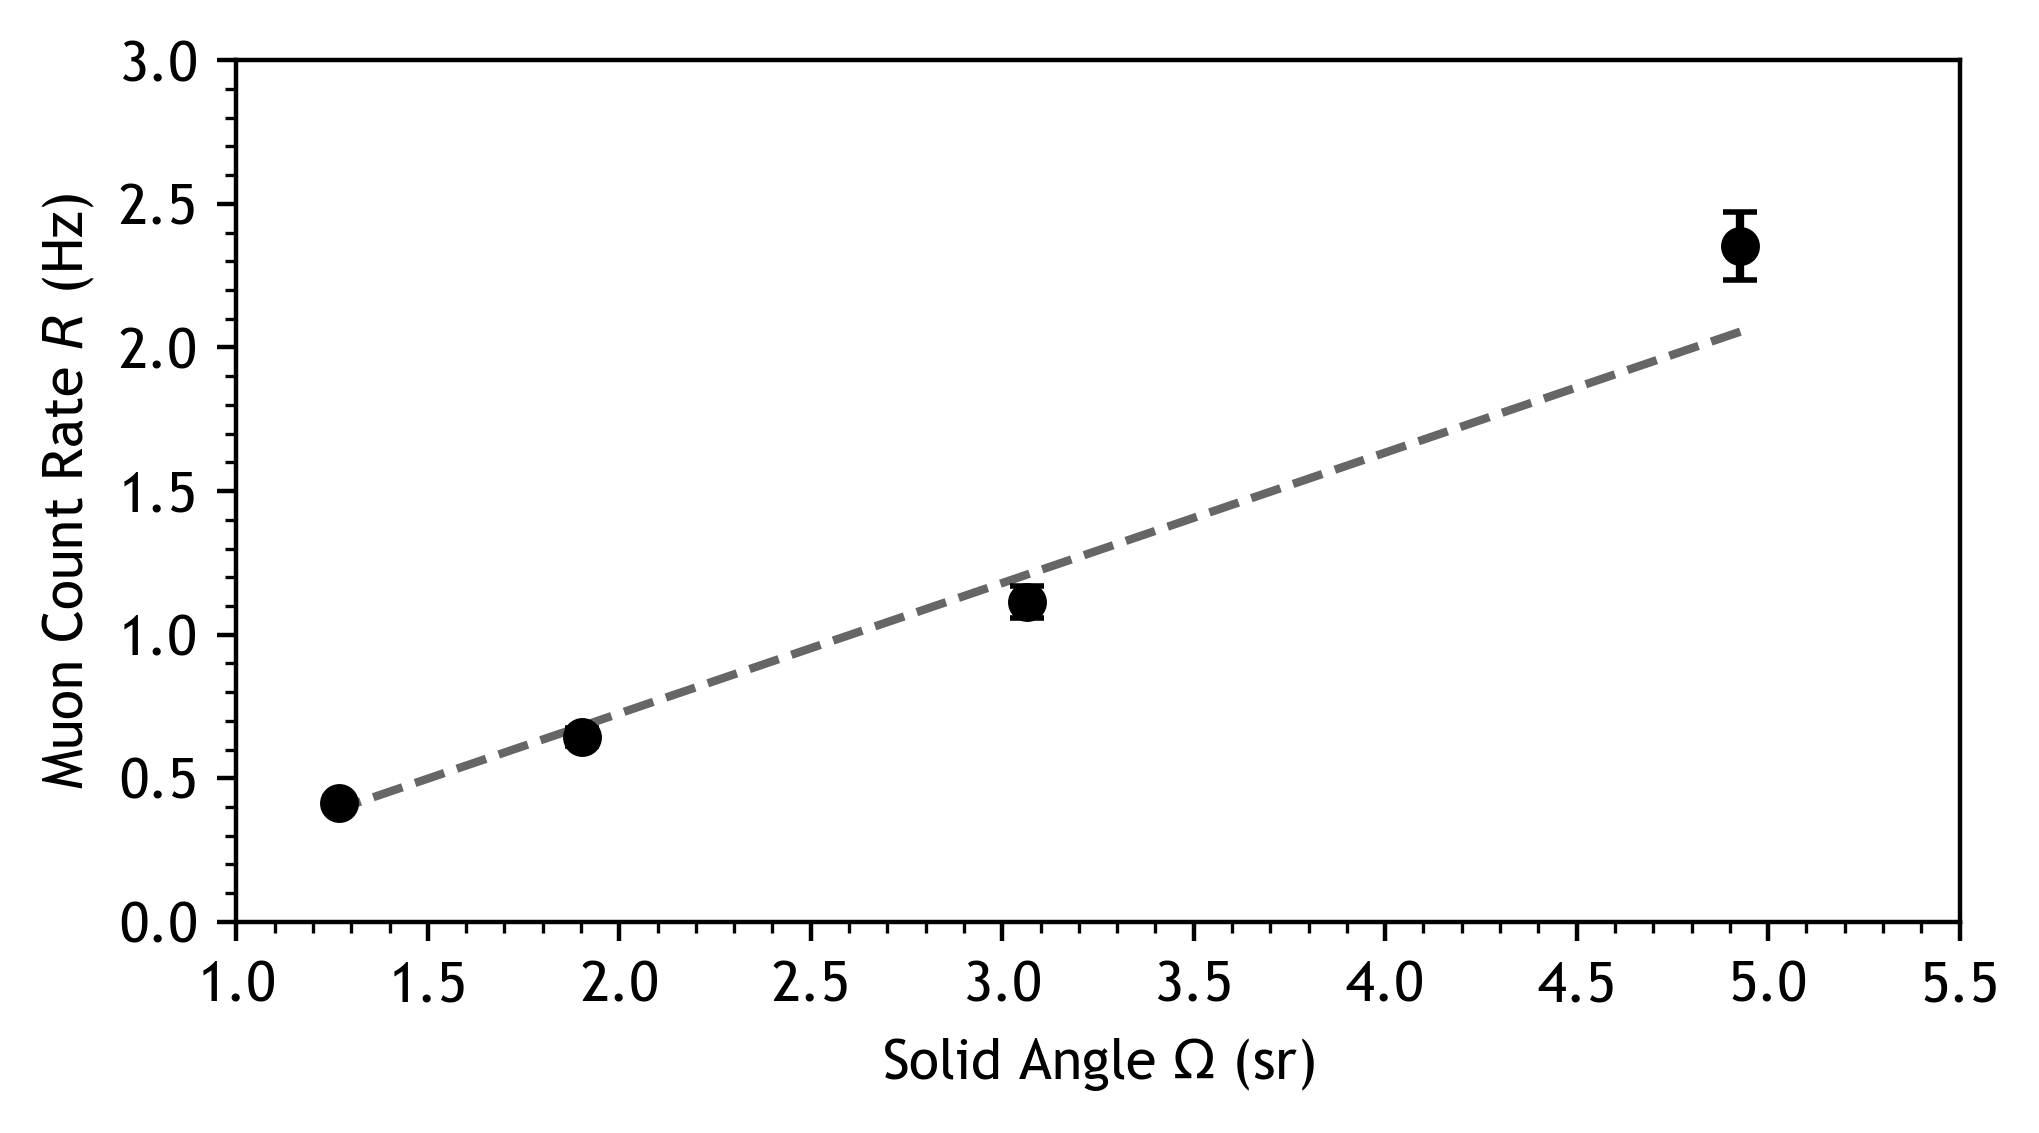

In [194]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.dpi'] = 400

N_mu = 400 # Number of muon counts taken
L = 32*np.sqrt(2) # Length of the scintillator in centimetres.
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
Omega = 2*np.pi*(1-np.cos(theta/2)) # approximate solid angle subtended by scintillators

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B = np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=1)
regression = np.poly1d((A, B))

max_rate = np.max(N_mu/t)

fig, ax = plt.subplots(figsize=(5,5))

ax.minorticks_on()
ax.set_box_aspect(0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.tight_layout()

ax.set_ylim(-0,3)
ax.set_xlim(1,5.5)

ax.set_xlabel("Solid Angle $\Omega$ (sr)", size=10)
ax.set_ylabel("Muon Count Rate $R$ (Hz)", size=10)

#CHI-SQUARED SUM CALCULATION
chi2 = 0
for i in range(4):
    chi2 += (regression(Omega[i]) - (N_mu/t[i]))**2/(N_mu/t[i])
print("chi^2 sum = {}".format(chi2))

ax.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3)
ax.plot(Omega,regression(Omega),'k--', alpha=0.6)
ax.scatter(Omega, N_mu/t, color='k', marker='o', s=5)
plt.show()

### Page 5 

This regression is actually the same as that on page 4, only that the degree of the fitted polynomial has been increased from 1 to 2. 

chi^2 sum = 0.0014187288880958243


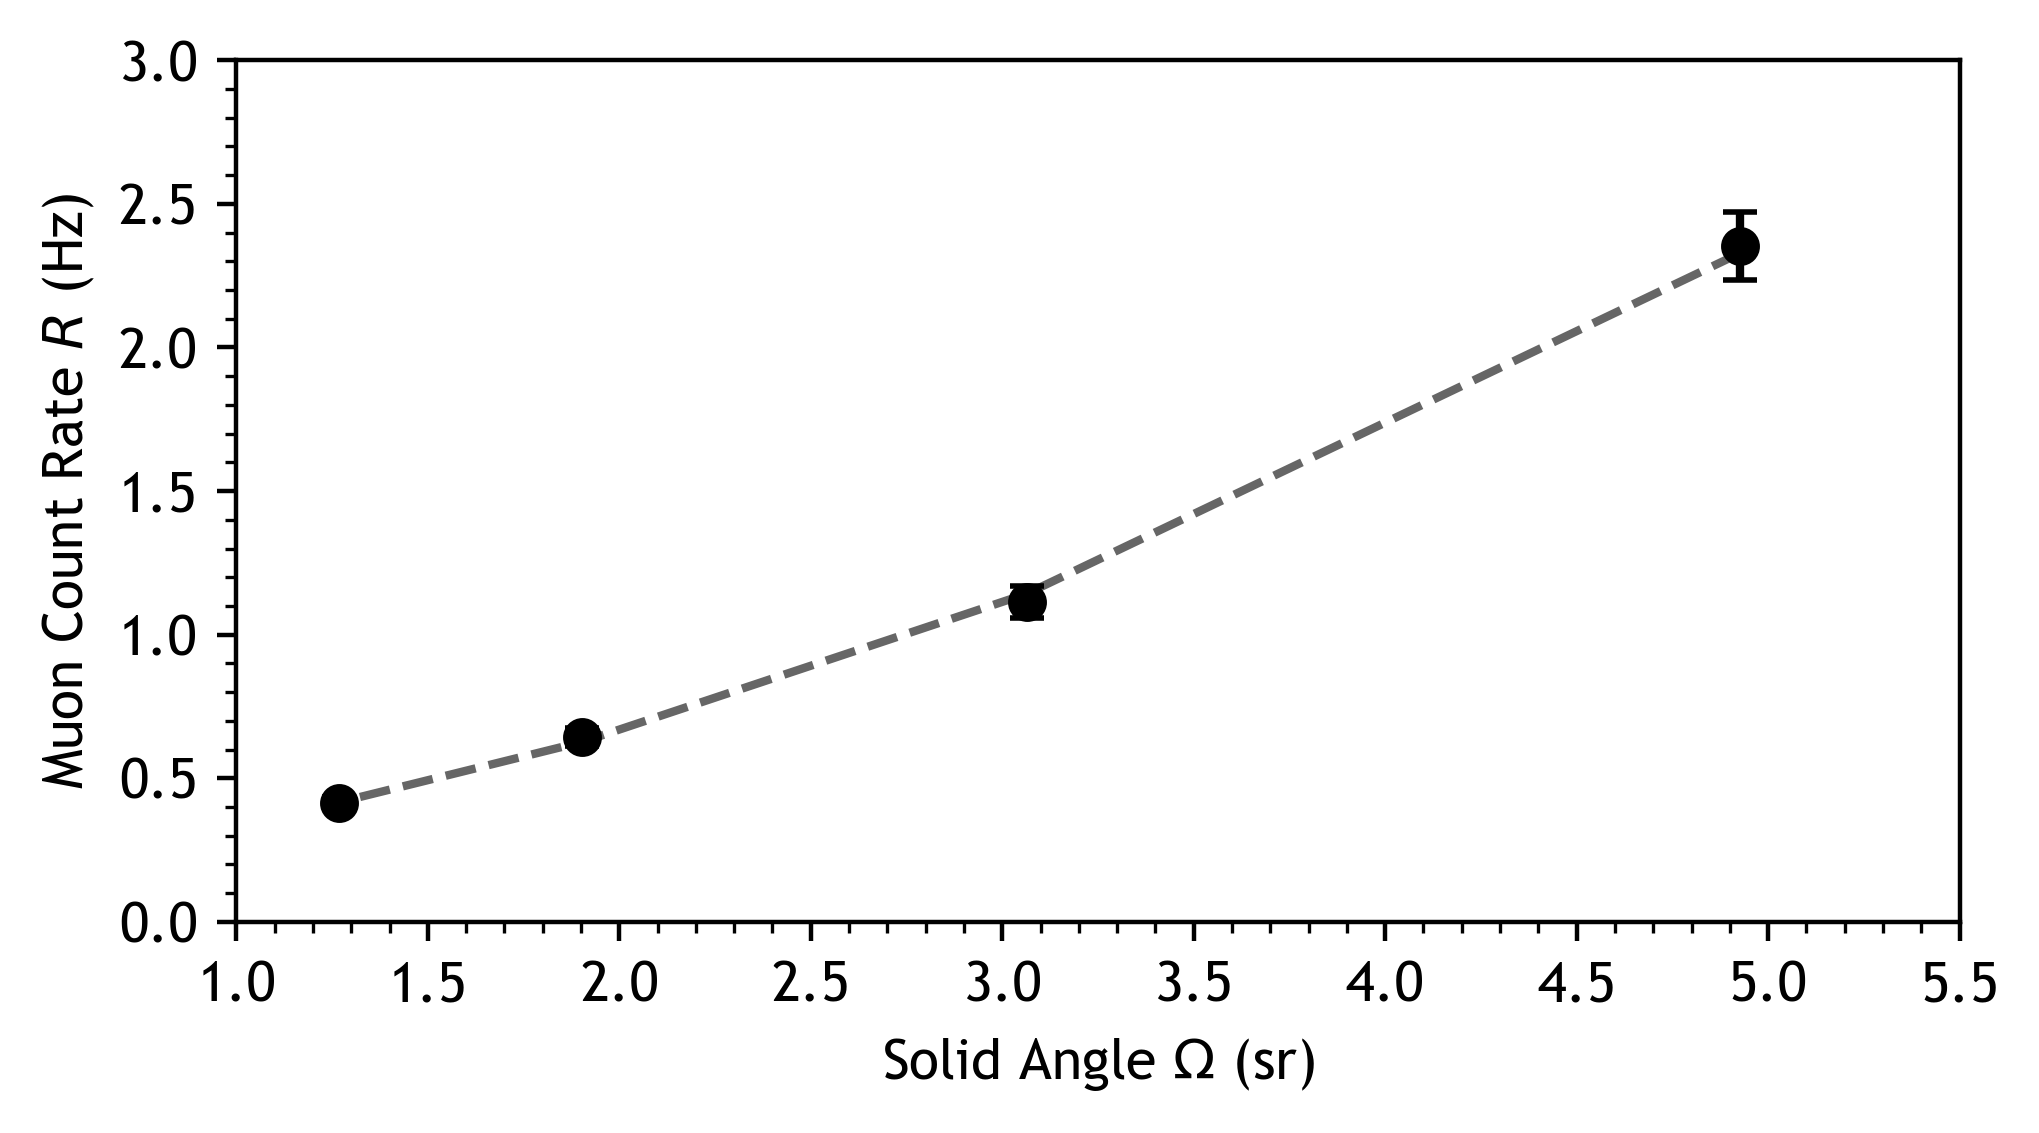

In [201]:
import matplotlib.pyplot as plt
import numpy as np

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B, C= np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=2)
regression = np.poly1d((A, B, C))

max_rate = np.max(N_mu/t)

fig, ax = plt.subplots(figsize=(5,5))

ax.minorticks_on()
ax.set_box_aspect(0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
fig.tight_layout()

ax.set_ylim(-0,3)
ax.set_xlim(1,5.5)

ax.set_xlabel("Solid Angle $\Omega$ (sr)", size=10)
ax.set_ylabel("Muon Count Rate $R$ (Hz)", size=10)

#CHI-SQUARED SUM CALCULATION
chi2 = 0
for i in range(4):
    chi2 += (regression(Omega[i]) - (N_mu/t[i]))**2/(N_mu/t[i])
print("chi^2 sum = {}".format(chi2))

ax.errorbar(Omega,N_mu/t,yerr=np.sqrt(400)/t,fmt='ko', capsize=3)
ax.plot(Omega,regression(Omega),'k--', alpha=0.6)
ax.scatter(Omega, N_mu/t, color='k', marker='o', s=5)
plt.show()

### Page 6

Below, two $\chi^{2}$ sums are calculated to contrast the model proposed in the paper with the originally assumed linear fit. The first calculation is in regards to the proposed model and the second calculation is that of the linear regression.

In [193]:
import scipy.optimize as ssopt


def fit(x,a,b,c):
    return a*((1/2)*c*(x-b) + np.sin(2*(c*(x-b))/4))
            

N_mu = 400 # Number of muon counts taken
t = np.array([170,359,622,969]) # Time interval for N_mu counts in seconds.
d = np.array([10,27,44,60]) # Distance between the scintillators in centimetres.
R = t/400 + t/np.sqrt(400)
theta = 2*np.arctan(L/d) # Angle between opposite corners of the scintillator
Omega = 4*np.arcsin((l*b)/np.sqrt((l**2 + 4*d**2)*(b**2 + 4*d**2))) #Solid angle subtended by scintillators
Omega_old = 2*np.pi*(1-np.cos(theta/2))

#Calculate coefficients for line of best fit (minimise chi-squared)
A, B = ssopt.curve_fit(f=fit, xdata=Omega, ydata=N_mu/t, sigma=np.sqrt(N_mu)/t)

#Calculate coefficients for line of best fit (minimise chi-squared)
C, D= np.polyfit(Omega, N_mu/t, w=t/np.sqrt(400), deg=1)
regression = np.poly1d((C, D))

yfit = []
for x in np.linspace(0,2*np.pi,1000):
    yfit.append(fit(x, A[0], A[1], A[2]))
    
chi2 = 0
for i in range(4):
    chi2 += ((fit(Omega[i], A[0], A[1], A[2]) - N_mu/t[i])**2)/(fit(Omega[i], A[0], A[1], A[2]))                                           
print("chi^2 sum = {}".format(chi2))

chi^2 sum = 0.0016371158624114085


In [192]:
chi2 = 0
for i in range(4):
    chi2 += ((regression(Omega[i]) - N_mu/t[i])**2)/(regression(Omega[i]))
print("chi^2 sum = {}".format(chi2))

chi^2 sum = 0.01921691808513054
